This notebook will introduce time-series analyses. Time series analysis involves studying the patterns, trends, and behavior of data points over time. Here are some basic time series analyses and techniques that you can use:

Poisson Regression (Parametric) or Negative Binomial Regression (Nonparametric)

Autoregression

Moving Average

Autocorrelation

Partial Autocorrelation

Stationary Test

Seasonal Decomposition

Autoregressive Integrated Moving Average (ARIMA)

Seasonal Autoregressive Integrated Moving Average (SARIMA)

It is also useful to know there are two kinds of time-series analyses. While I will not break this down for the purposes of this notebook, analyses are either for stationary data, that which does not have a changing mean or variance (i.e. calories intake is roughly stationary), and non-stationary data, such as stock prices (these increase with time due to value/inflation, or they dive).

GPT: "What is Poisson Regression?"

Poisson regression is a type of regression analysis used when the dependent variable represents counts and follows a Poisson distribution. The Poisson distribution is commonly used to model the number of events that occur in a fixed interval of time or space. Poisson regression is particularly suitable for situations where the dependent variable is a count of discrete events, and the events are rare and independent of each other.

The Poisson regression model is suitable when the following assumptions are met:

The dependent variable is a count of events.

Events are independent of each other.

The events occur with a constant average rate across the observation period.

The variance of the count data is approximately equal to the mean.

If the assumptions are violated, it might be necessary to consider alternative models, such as negative binomial regression, which allows for overdispersion (variance greater than the mean).

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

Root Mean Squared Error (RMSE) for Poisson Regression: 46.18164011287395
R-squared for Poisson Regression: 0.8507733093212086

                 Generalized Linear Model Regression Results                  
Dep. Variable:             passengers   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -969.63
Date:                Sun, 26 Nov 2023   Deviance:                       876.43
Time:                        00:21:46   Pearson chi2:                     897.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covar

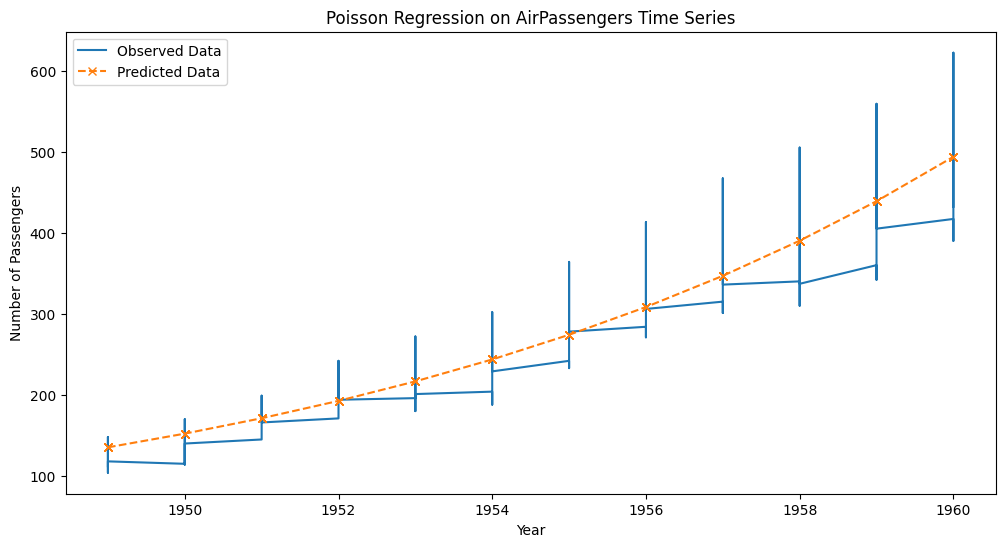

In [14]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the AirPassengers dataset from seaborn
air_passengers = sns.load_dataset("flights")

# Display the first few rows of the dataset
print(air_passengers.head())

# Fit Poisson regression model
X = sm.add_constant(air_passengers[['year']])
poisson_model = sm.GLM(air_passengers['passengers'], X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Predicted values
passengers_pred = poisson_results.predict(X)

# Calculate RMSE
print()
rmse = np.sqrt(mean_squared_error(air_passengers['passengers'], passengers_pred))
print(f"Root Mean Squared Error (RMSE) for Poisson Regression: {rmse}")

# Calculate R-squared
r2 = r2_score(air_passengers['passengers'], passengers_pred)
print(f"R-squared for Poisson Regression: {r2}")
print()
# Display regression summary
print(poisson_results.summary())

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['year'], air_passengers['passengers'], label='Observed Data')
plt.plot(air_passengers['year'], passengers_pred, label='Predicted Data', linestyle='dashed', marker='x')
plt.title('Poisson Regression on AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

If this data did not pass assumptions, use negative binomial regression. 


Root Mean Squared Error (RMSE) for Negative Binomial Regression: 46.61068529833381
R-squared for Negative Binomial Regression: 0.8479876827641101

                 Generalized Linear Model Regression Results                  
Dep. Variable:             passengers   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -943.81
Date:                Sun, 26 Nov 2023   Deviance:                       2.8434
Time:                        00:22:32   Pearson chi2:                     2.93
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1537
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0

C:\Users\Public\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


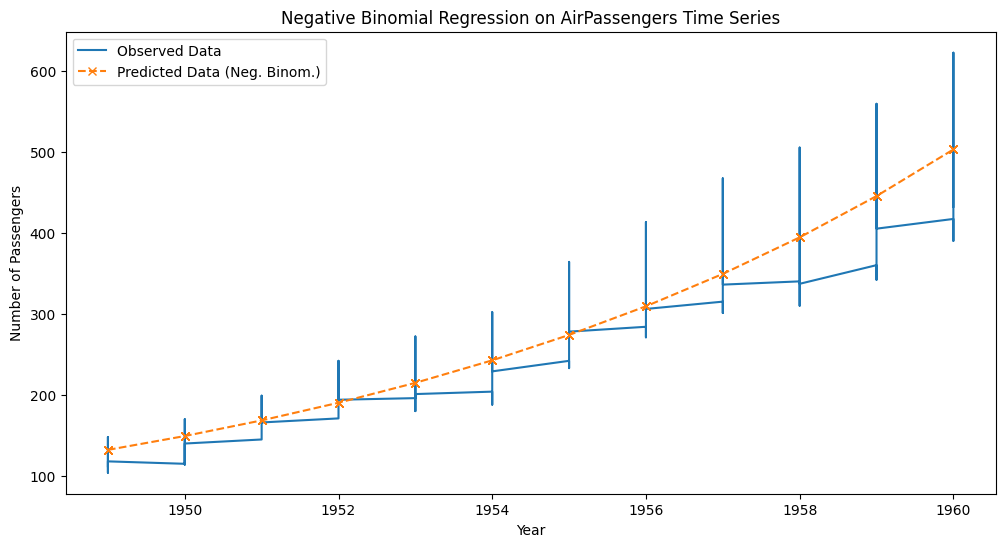

In [16]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the AirPassengers dataset from seaborn
air_passengers = sns.load_dataset("flights")

# Fit Negative Binomial regression model
X = sm.add_constant(air_passengers[['year']])
negbinom_model = sm.GLM(air_passengers['passengers'], X, family=sm.families.NegativeBinomial())
negbinom_results = negbinom_model.fit()

# Predicted values
passengers_pred_negbinom = negbinom_results.predict(X)

# Calculate RMSE
print()
rmse_negbinom = np.sqrt(mean_squared_error(air_passengers['passengers'], passengers_pred_negbinom))
print(f"Root Mean Squared Error (RMSE) for Negative Binomial Regression: {rmse_negbinom}")

# Calculate R-squared
r2_negbinom = r2_score(air_passengers['passengers'], passengers_pred_negbinom)
print(f"R-squared for Negative Binomial Regression: {r2_negbinom}")
print()
# Display regression summary
print(negbinom_results.summary())

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['year'], air_passengers['passengers'], label='Observed Data')
plt.plot(air_passengers['year'], passengers_pred_negbinom, label='Predicted Data (Neg. Binom.)', linestyle='dashed', marker='x')
plt.title('Negative Binomial Regression on AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

GPT: "What is autocorrelation and how does it compare to autoregression"

Autocorrelation and autoregression are related concepts in time series analysis, but they represent different aspects of the data.

Autocorrelation

Definition: Autocorrelation measures the degree of similarity between a time series and a lagged version of itself at different time lags.

Purpose: It helps identify patterns or dependencies within the time series data. Autocorrelation is a crucial concept in understanding the temporal structure of time series data.

Partial Autocorrelation

Definition: ACF measures the correlation between a time series and its lagged values at different time lags.

Autoregression

Definition: Autoregression is a modeling technique where a time series is modeled as a linear combination of its past values (lags). The idea is to predict the current value based on its own past values.

Purpose: Autoregressive models are used to capture and exploit the temporal dependencies present in a time series. The order of the autoregressive model (p) determines how many past values are used for prediction.

Comparison

Relationship: Autoregression is one way to model and quantify autocorrelation. Autoregressive models explicitly use past values to predict future values, capturing the autocorrelation structure.

Focus: Autocorrelation is a broader concept that quantifies the statistical relationship between a time series and its past values at different lags. Autoregression, on the other hand, specifically involves modeling the time series using its own past values.

In summary, autocorrelation is a statistical measure that helps understand the temporal dependencies in time series data, while autoregression is a modeling technique that leverages these dependencies to make predictions based on past values. Autoregression is a specific approach to capturing and utilizing autocorrelation in a time series.

GPT: "What is autoregression?"

Autoregression, often denoted as AR, is a statistical method that models a time series data point based on its own past values. In other words, it is a regression of the time series against itself. Autoregressive models are commonly used in time series analysis and forecasting.

Autoregressive models are useful for capturing temporal dependencies and patterns in time series data. They are a fundamental component of more advanced time series models, such as ARIMA (Autoregressive Integrated Moving Average) models. The estimation of autoregressive coefficients is typically done using methods like ordinary least squares (OLS) regression.

C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


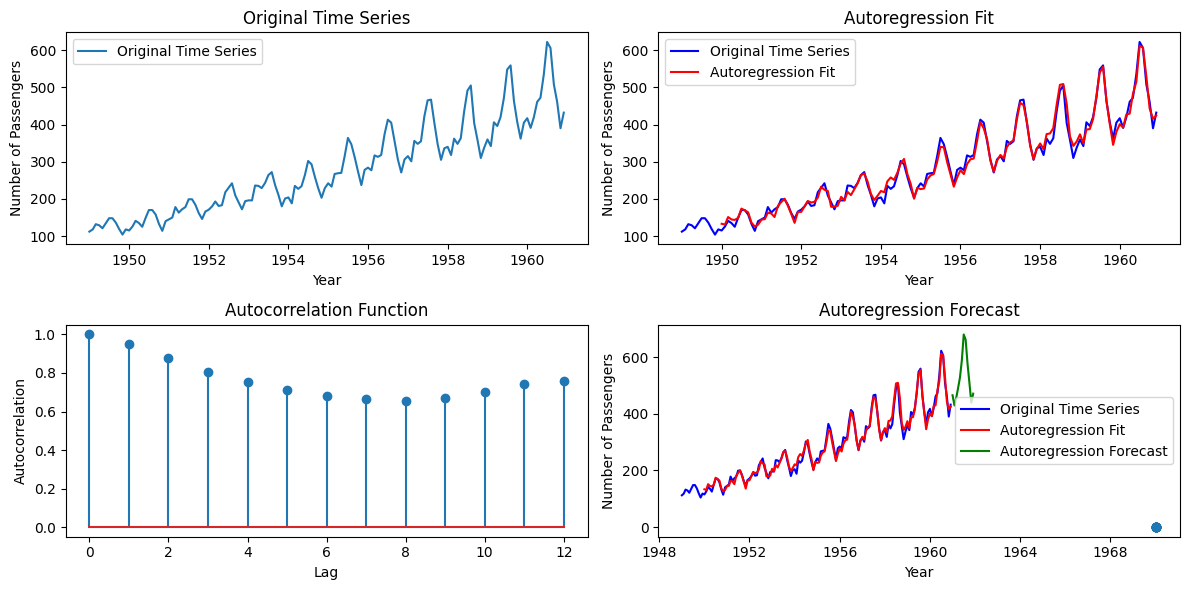

                            AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                  144
Model:                    AutoReg(12)   Log Likelihood                -530.959
Method:               Conditional MLE   S.D. of innovations             13.511
Date:                Sun, 26 Nov 2023   AIC                           1089.918
Time:                        03:12:49   BIC                           1130.277
Sample:                    01-01-1950   HQIC                          1106.318
                         - 12-01-1960                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.4369      3.450      2.735      0.006       2.675      16.198
Passengers.L1      0.4437      0.074      6.017      0.000       0.299       0.588
Passengers.L2     -0.2716      0.082

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Compute Autoregression
lag = 12  # You can adjust the lag order as needed
autoreg_model = AutoReg(df, lags=lag)
autoreg_results = autoreg_model.fit()
autoreg_forecast = autoreg_results.predict(start=len(df), end=len(df) + 11, dynamic=False)

# Compute Autocorrelation and Partial Autocorrelation
acf_values = acf(df, nlags=lag, fft=False)
pacf_values = pacf(df, nlags=lag)

# Plotting
plt.figure(figsize=(12, 6))

# Original Time Series
plt.subplot(2, 2, 1)
plt.plot(df, label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()

# Autoregression Fit
plt.subplot(2, 2, 2)
plt.plot(df, label='Original Time Series', color='blue')
plt.plot(autoreg_results.fittedvalues, label='Autoregression Fit', color='red')
plt.title('Autoregression Fit')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()

# Autocorrelation
plt.subplot(2, 2, 3)
plt.stem(range(lag + 1), acf_values)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Partial Autocorrelation
plt.subplot(2, 2, 4)
plt.stem(range(lag + 1), pacf_values)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

# Autoregression Forecast
plt.subplot(2, 2, 4)
plt.plot(df, label='Original Time Series', color='blue')
plt.plot(autoreg_results.fittedvalues, label='Autoregression Fit', color='red')
plt.plot(autoreg_forecast, label='Autoregression Forecast', color='green')
plt.title('Autoregression Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()

plt.tight_layout()
plt.show()

# Display regression summary
print(autoreg_results.summary())

Moving Average Analysis is a statistical technique used in time series analysis to identify trends and patterns in data by smoothing out variations over time. It involves calculating the average of a set of consecutive observations, where the "window" or "span" of observations included in the average moves forward through the time series. Smoothing allows you to identify trends that are larger, because small fluctuations (noise) will flatten).

There are two main types of moving averages:

Simple Moving Average (SMA): In a Simple Moving Average, each data point in the time series is given equal weight. The average is calculated by summing up a set number of consecutive data points and dividing by the number of points in the set.

Exponential Moving Average (EMA): In an Exponential Moving Average, more recent observations are given higher weights, and older observations are given exponentially decreasing weights. This makes EMA more responsive to recent changes in the time series.

Moving averages are useful for smoothing out short-term fluctuations in time series data, revealing long-term trends, and identifying potential turning points. They are widely used in various fields, including finance, economics, and signal processing.

Moving Average Analysis is often used in combination with other time series analysis techniques, such as autoregressive models, to provide a more comprehensive understanding of the underlying patterns in the data.

GPT: "How does Moving Average differ from Autoregression?"

Moving averages and autoregression are both techniques used in time series analysis, but they differ in their approaches to capturing patterns and trends in data.

Moving Average:
Weighting:

Simple Moving Average (SMA): In SMA, each data point within the moving average window is given equal weight.
Exponential Moving Average (EMA): In EMA, more recent data points are given higher weights, and older data points have exponentially decreasing weights.

Smoothing:

Moving averages are used to smooth out short-term fluctuations and highlight long-term trends in time series data.
Dependence on Past Values:

Moving averages do not explicitly model dependence on past values. The value at each time point is a function of a fixed window of recent observations.
Autoregression:

Weighting:

Autoregressive models explicitly assign weights to past values based on the autoregressive coefficients.
Each past value is multiplied by a coefficient that determines its contribution to the current value.

Smoothing:

Autoregressive models capture temporal dependencies and patterns in the data by considering the relationships between current and past values.

Dependence on Past Values:

Autoregressive models are designed to model and quantify the dependence of a variable on its own past values.
Key Differences:

Modeling Approach:

Moving averages focus on smoothing and capturing trends by averaging recent observations.
Autoregressive models explicitly model the dependence of the current value on its past values, capturing more complex temporal relationships.

Weighting Scheme:

Moving averages use a fixed weighting scheme (equal weights for SMA, and exponentially decreasing weights for EMA).
Autoregressive models allow for flexible weighting based on estimated autoregressive coefficients.

Handling of Noise:

Moving averages are effective at smoothing out noise and short-term fluctuations.
Autoregressive models can capture and quantify the impact of past values on the current value, including noise and trend components.

Application:

Moving averages are often used for trend analysis and noise reduction.
Autoregressive models are used to model and predict time series data, especially when temporal dependencies are crucial.
In practice, a combination of both techniques, such as in the ARIMA (Autoregressive Integrated Moving Average) model, is often used for more comprehensive time series analysis. ARIMA combines autoregressive and moving average components to capture both temporal dependencies and smoothing effects.







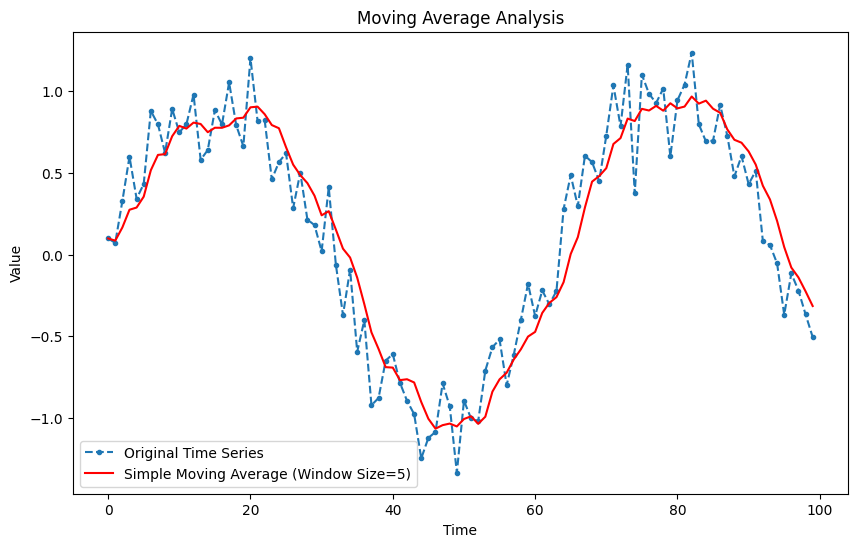

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic time series data
n_obs = 100
t = np.arange(n_obs)
y = np.sin(0.1 * t) + 0.2 * np.random.randn(n_obs)  # Example: Sinusoidal pattern with noise

# Perform Simple Moving Average (SMA)
window_size = 5
sma = pd.Series(y).rolling(window=window_size, min_periods=1).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Original Time Series', linestyle='--', marker='o', markersize=3)
plt.plot(t, sma, label=f'Simple Moving Average (Window Size={window_size})', color='red')
plt.title('Moving Average Analysis')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Next I will show two plots just to clarify, Moving Average analyzes points over a time period and attempts to flatten noise, wheras an autoregression is predictive.

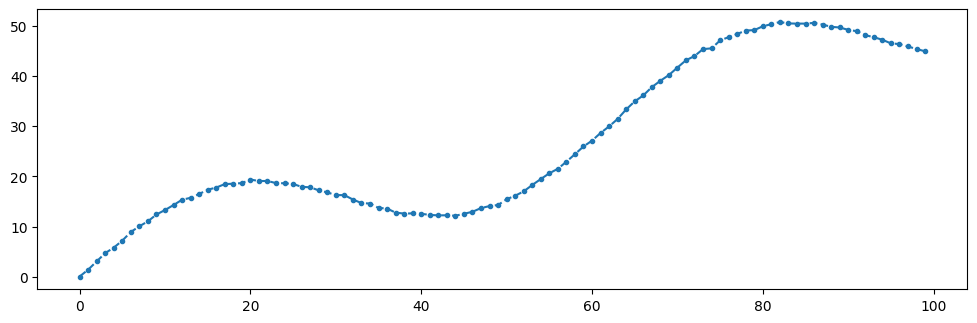

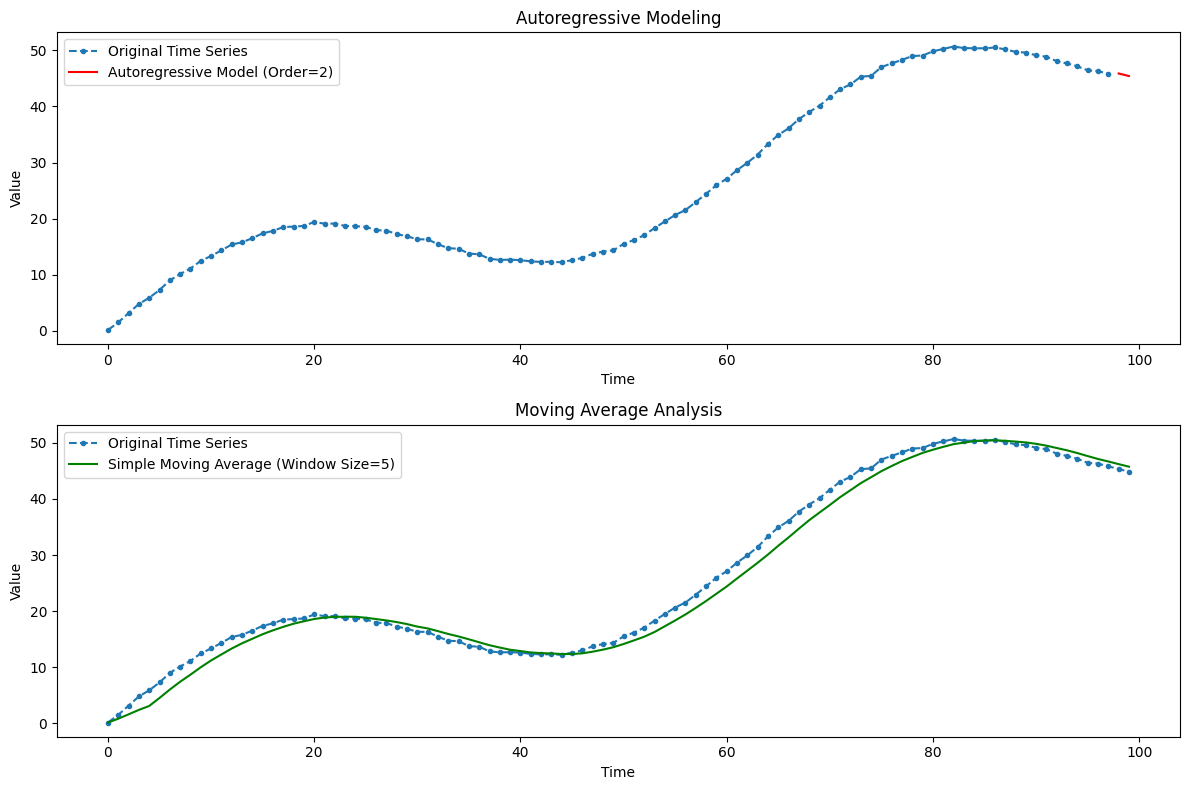

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          1.29e-100
Time:                        02:34:24   Log-Likelihood:                -173.81
No. Observations:                  98   AIC:                             351.6
Df Residuals:                      96   BIC:                             356.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3898      0.286      4.853      0.0

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic time series data
n_obs = 100
t = np.arange(n_obs)
y = 0.5 * t + 10 * np.sin(0.1 * t) + 0.2 * np.random.randn(n_obs)

# Perform Autoregressive (AR) modeling
order_ar = 2  # Autoregressive order
X_ar = sm.add_constant(y[:-order_ar])  # Lagged values as features
y_ar = y[order_ar:]

# Fit autoregressive model
model_ar = sm.OLS(y_ar, X_ar)
results_ar = model_ar.fit()

# Predict values using the autoregressive model
y_pred_ar = results_ar.predict(sm.add_constant(y[-order_ar:]))

# Perform Simple Moving Average (SMA)
window_size = 5
sma = pd.Series(y).rolling(window=window_size, min_periods=1).mean()

# Plot the original time series, autoregressive model predictions, and moving average
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t[:-order_ar], y[:-order_ar], label='Original Time Series', linestyle='--', marker='o', markersize=3)
plt.plot(t[-order_ar:], y_pred_ar, label=f'Autoregressive Model (Order={order_ar})', color='red')
plt.title('Autoregressive Modeling')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, y, label='Original Time Series', linestyle='--', marker='o', markersize=3)
plt.plot(t, sma, label=f'Simple Moving Average (Window Size={window_size})', color='green')
plt.title('Moving Average Analysis')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# Display autoregressive model summary
print(results_ar.summary())

Next I will use ARIMA and AR

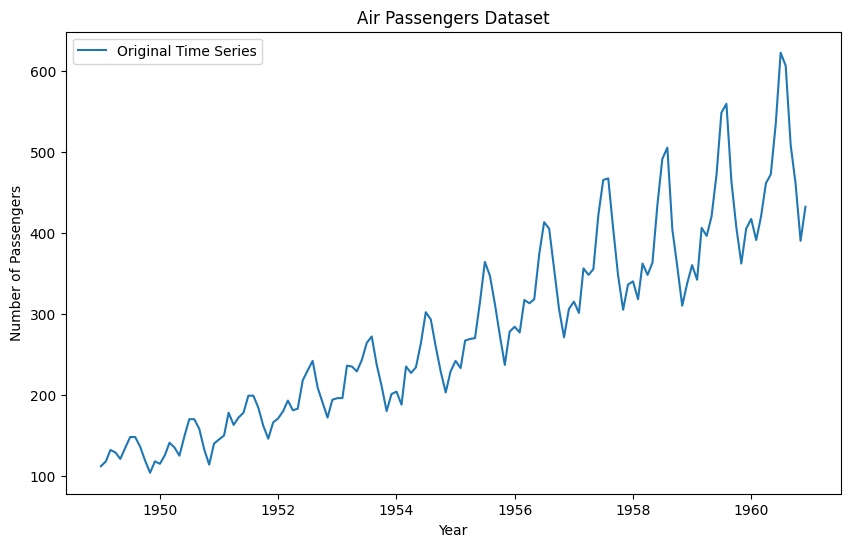

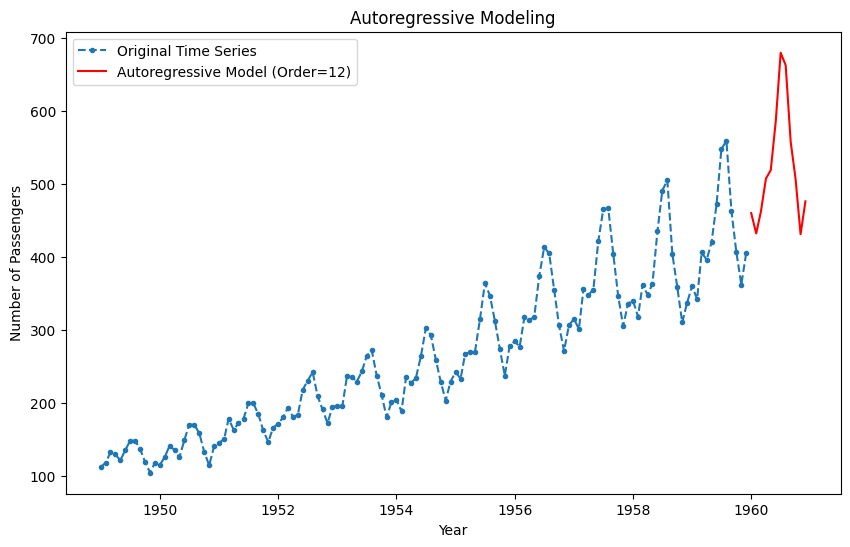

C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


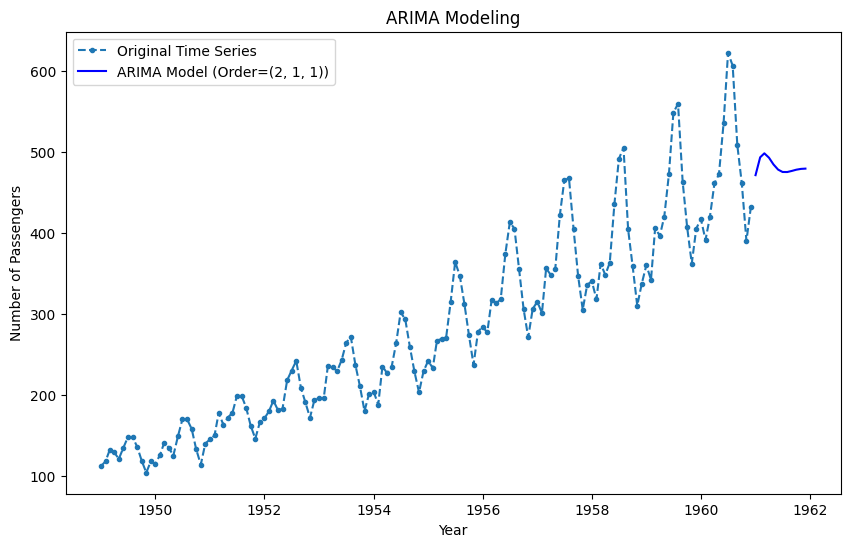

Autoregressive Model Summary:
                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     6765.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          5.65e-114
Time:                        02:44:44   Log-Likelihood:                -551.60
No. Observations:                 132   AIC:                             1107.
Df Residuals:                     130   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6664 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df = df.squeeze()  # Convert DataFrame to Series

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Time Series')
plt.title('Air Passengers Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Autoregressive (AR) modeling
order_ar = 12  # Autoregressive order (monthly data, so using 12 for one year)
X_ar = sm.add_constant(df[:-order_ar])  # Lagged values as features
y_ar = df[order_ar:]

# Ensure indices are aligned
X_ar.index = y_ar.index

# Fit autoregressive model
model_ar = sm.OLS(y_ar, X_ar)
results_ar = model_ar.fit()

# Predict values using the autoregressive model
y_pred_ar = results_ar.predict(sm.add_constant(df[-order_ar:]))
y_pred_ar.index = df[-order_ar:].index  # Ensure indices are aligned

# Plot Autoregressive model predictions
plt.figure(figsize=(10, 6))
plt.plot(df[:-order_ar].index, df[:-order_ar], label='Original Time Series', linestyle='--', marker='o', markersize=3)
plt.plot(df[-order_ar:].index, y_pred_ar, label=f'Autoregressive Model (Order={order_ar})', color='red')
plt.title('Autoregressive Modeling')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# ARIMA (AutoRegressive Integrated Moving Average) modeling
order_arima = (2, 1, 1)  # ARIMA order (p, d, q)
model_arima = sm.tsa.ARIMA(df, order=order_arima)
results_arima = model_arima.fit()

# Predict values using the ARIMA model
y_pred_arima = results_arima.get_forecast(steps=12).predicted_mean

# Plot ARIMA model predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df, label='Original Time Series', linestyle='--', marker='o', markersize=3)
plt.plot(y_pred_arima.index, y_pred_arima, label=f'ARIMA Model (Order={order_arima})', color='blue')
plt.title('ARIMA Modeling')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Display Autoregressive model summary
print("Autoregressive Model Summary:")
print(results_ar.summary())

# Display ARIMA model summary
print("\nARIMA Model Summary:")
print(results_arima.summary())

It is my understanding that the autoregession model predicts based on the trend, which is why the plot shows another spike. However, the ARIMA can be interpretted as a small increase soon, but there is to much noise after to be sure about any more growth, so it starts to level off.

Next I will introduce SARIMA. SARIMA, which stands for Seasonal AutoRegressive Integrated Moving Average, is an extension of the ARIMA (AutoRegressive Integrated Moving Average) model that includes seasonal components. It is a time series forecasting model designed to handle data with a clear seasonal pattern or periodic fluctuations.

The SARIMA model is specified by three sets of parameters: Seasonal Components, Seasonal Order, Non-Seasonal Components

Next, I try to push GPT with a lengthy instruction list.

GPT: "Using the air passengers dataset, split it for training and testing, compute an ARIMA and SARIMA, then report the accuracies of the models"

C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

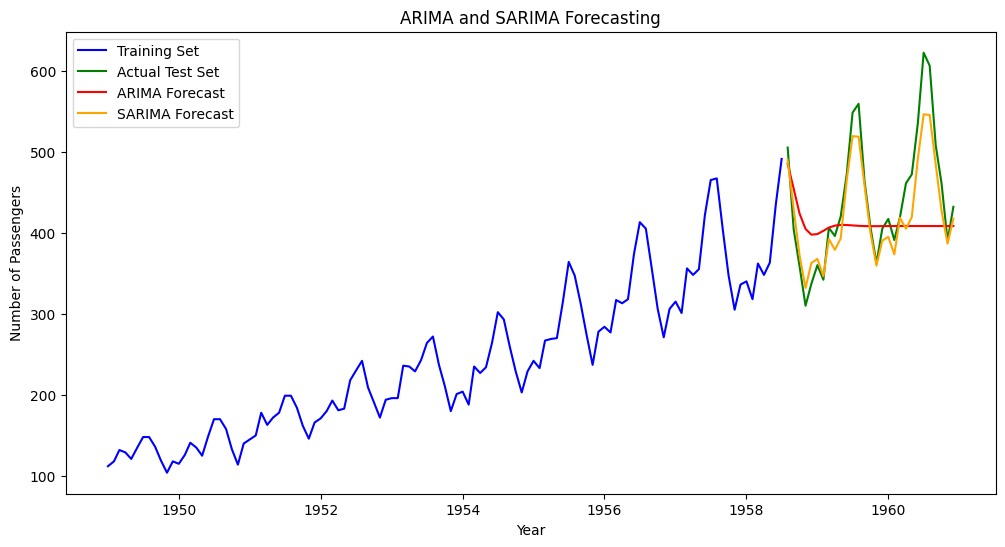

ARIMA Mean Absolute Error (MAE): 60.5289954951683
ARIMA Root Mean Squared Error (RMSE): 82.62109675133418

SARIMA Mean Absolute Error (MAE): 23.55553640306319
SARIMA Root Mean Squared Error (RMSE): 30.14181165056383


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)  # 80% for training
train, test = df[0:train_size], df[train_size:]

# ARIMA Model
order_arima = (2, 1, 1)  # Replace with the appropriate order for your ARIMA model
arima_model = ARIMA(train, order=order_arima)
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=len(test))

# SARIMA Model
order_sarima = (1, 1, 1, 12)  # Replace with the appropriate order for your SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
sarima_forecast = sarima_results.get_forecast(steps=len(test)).predicted_mean

# Evaluate forecast accuracy
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))

sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Actual Test Set', color='green')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='orange')
plt.title('ARIMA and SARIMA Forecasting')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Print accuracy metrics
print("ARIMA Mean Absolute Error (MAE):", arima_mae)
print("ARIMA Root Mean Squared Error (RMSE):", arima_rmse)

print("\nSARIMA Mean Absolute Error (MAE):", sarima_mae)
print("SARIMA Root Mean Squared Error (RMSE):", sarima_rmse)


We can see visually and empirically the SARIMA was much more impressive at predicting. Try something even more interesting like stock data. GPT3.5 cannot pull this data right now, but maybe future version can do this or a specific GPT instance can be spun up.

This is a good start with time-series, next I will briefly cover Stationary Testing. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. Stationarity simplifies the modeling process because it allows for the assumption that future statistical properties will be the same as current ones.

GPT: "Using the air passengers dataset, compute a Augmented Dickey Fuller ADF Test, Kwiatkowski-Phillips-Schmidt-Shin Test, and Dickey-Fuller DF Test, then compare them"

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Ensure the data is a Series
df = df.squeeze()

# Function to perform ADF, KPSS, and DF tests
def stationarity_tests(series, test_name):
    print(f"Results of {test_name} Test:")
    if test_name == "ADF":
        result = adfuller(series, autolag='AIC')
        print(f"ADF Statistic: {result[0]}")
        print(f"P-value: {result[1]}")
        print(f"Critical Values: {result[4]}")
    elif test_name == "KPSS":
        result = kpss(series, regression='c')
        print(f"KPSS Statistic: {result[0]}")
        print(f"P-value: {result[1]}")
        print(f"Critical Values: {result[3]}")
    elif test_name == "DF":
        result = adfuller(series, regression='c')
        print(f"DF Statistic: {result[0]}")
        print(f"P-value: {result[1]}")
        print(f"Critical Values: {result[4]}")
    print("\n")

# Perform the tests
stationarity_tests(df, "ADF")
stationarity_tests(df, "KPSS")
stationarity_tests(df, "DF")


Results of ADF Test:
ADF Statistic: 0.8153688792060441
P-value: 0.9918802434376409
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


Results of KPSS Test:
KPSS Statistic: 1.6513122354165206
P-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


Results of DF Test:
DF Statistic: 0.8153688792060441
P-value: 0.9918802434376409
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}




<ipython-input-50-0925164b561c>:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


You can observe the ADF Statistic, P-value, and Critical Values for each test. A low p-value in the ADF and DF tests or a high p-value in the KPSS test suggests that the series is non-stationary. Comparing these results can give you insights into the stationarity properties of the time series.

You may want to decompose data into parts. Trends, season, and residuals can be found in a Seasonal Decomposition analysis. 

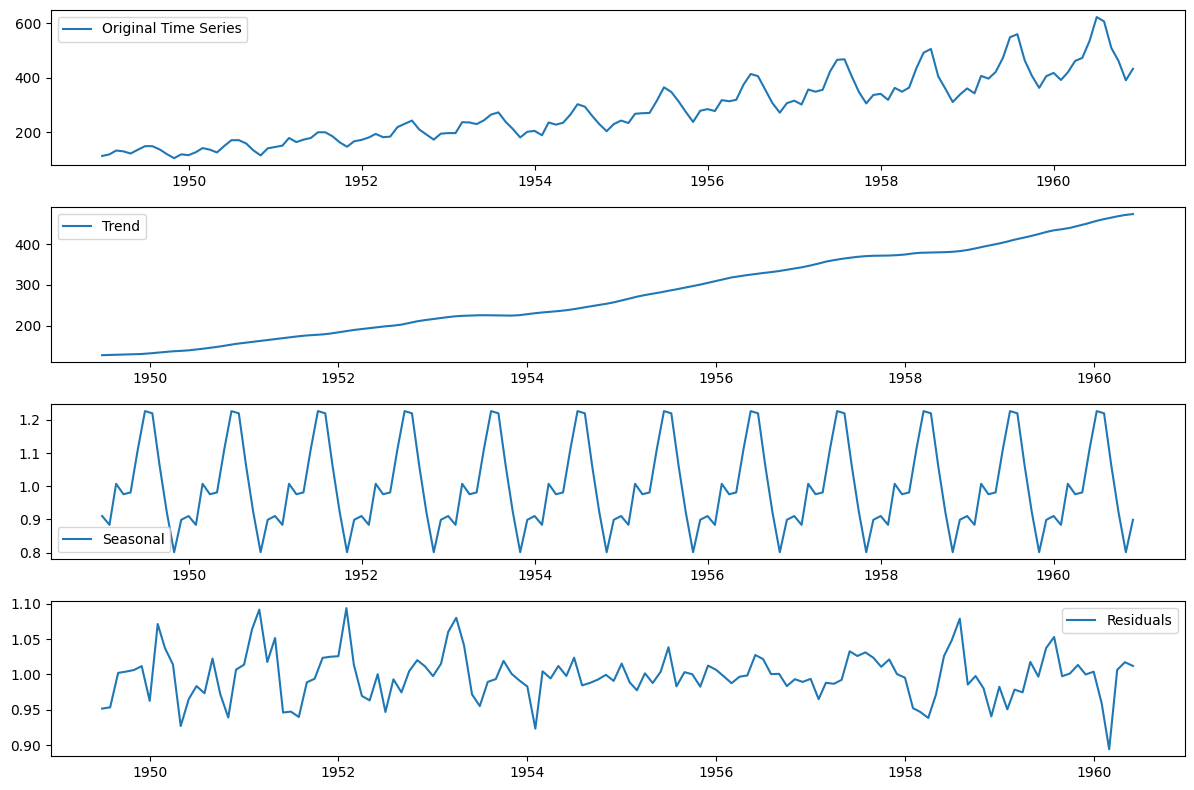

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Convert DataFrame to Series if needed
df = df.squeeze()

# Perform seasonal decomposition
result = seasonal_decompose(df, model='multiplicative', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


Lastly, a Fast Fourier Transform can be computed to identify frequencies underlying the data. I encourage students who feel proficinet in the time-series ideas and high level math to investigate FFT.

GPT: "Simulate stock data and compute an FFT"

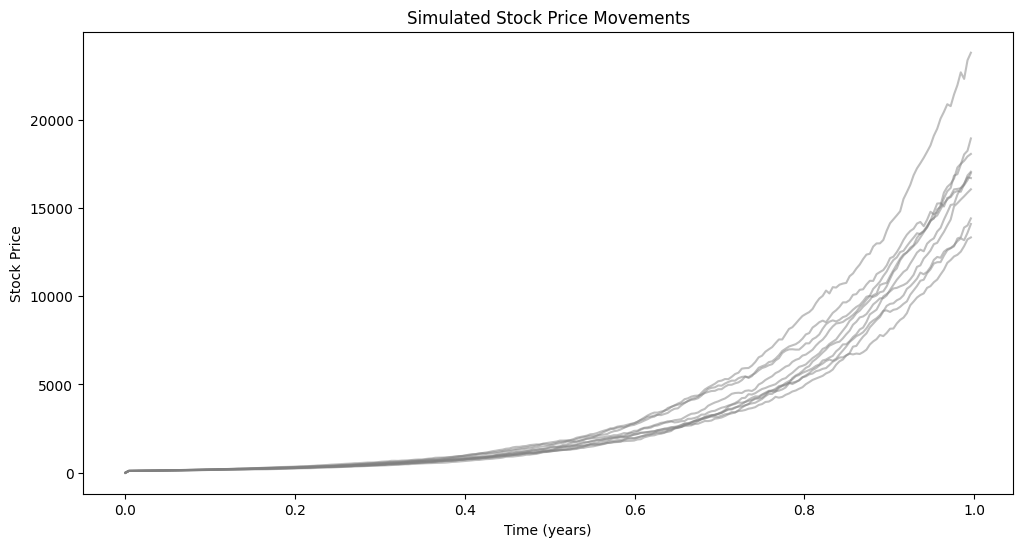

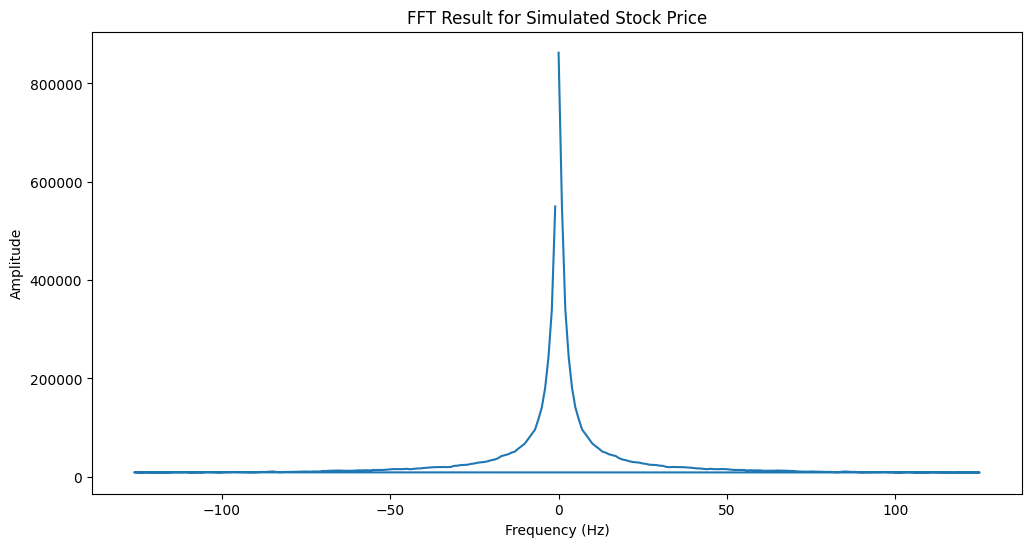

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate stock price movements
def simulate_stock_price(T, dt, initial_price, volatility, num_simulations):
    t = np.arange(0, T, dt)
    price_simulations = np.zeros((num_simulations, len(t)))
    
    for i in range(num_simulations):
        price = initial_price
        for j in range(1, len(t)):
            price = price * np.exp((0.5 * volatility**2 - 0.5 * volatility**2 * dt) + volatility * np.sqrt(dt) * np.random.normal())
            price_simulations[i, j] = price
    
    return t, price_simulations

# Simulation parameters
T = 1.0  # Total time (in years)
dt = 1/252  # Time step (assuming daily trading, 252 trading days in a year)
initial_price = 100.0  # Initial stock price
volatility = 0.2  # Volatility (annualized)
num_simulations = 10  # Number of simulations

# Simulate stock price movements
time, stock_prices = simulate_stock_price(T, dt, initial_price, volatility, num_simulations)

# Plot simulated stock prices
plt.figure(figsize=(12, 6))
plt.plot(time, stock_prices.T, color='gray', alpha=0.5)
plt.title('Simulated Stock Price Movements')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.show()

# Compute the FFT for one of the simulations
fft_result = np.fft.fft(stock_prices[0, :])
fft_freq = np.fft.fftfreq(len(stock_prices[0, :]), dt)

# Plot the FFT result
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, np.abs(fft_result))
plt.title('FFT Result for Simulated Stock Price')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()